<a href="https://colab.research.google.com/github/vinalyan/diff/blob/master/GeekBrains/%D0%9C%D0%B0%D1%82%D1%81%D1%82%D0%B0%D1%82_%D1%83%D1%80%D0%BE%D0%BA_8_%D0%94%D0%97_%D0%9A%D0%BE%D0%B6%D0%B5%D0%BC%D1%8F%D0%BA%D0%B8%D0%BD_%D0%92_%D0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. Даны значения роста в трех группах случайно выбранных спортсменов: Футболисты: 173, 175, 180, 178, 177, 185, 183, 182. Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180. Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.

In [7]:
stats.f_oneway?

In [3]:
foot = np.array([173, 175, 180, 178, 177, 185, 183, 182])
hock = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
shtan = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])

In [8]:
s = stats.f_oneway(foot, hock , shtan)

In [9]:
s.pvalue * 100 

1.0482206918698695

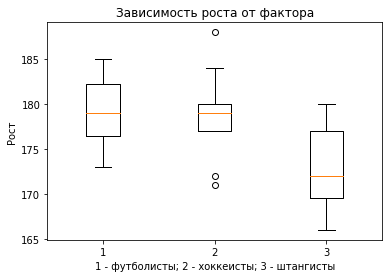

In [49]:
plt.boxplot([foot, hock, shtan])
plt.title('Зависимость роста от фактора')
plt.ylabel('Рост')
plt.xlabel('1 - футболисты; 2 - хоккеисты; 3 - штангисты')
plt.show()